In [1]:
# Import DeepInsight
import sys
sys.path.insert(0, "/home/marx/Documents/Github/DeepInsight")
import deepinsight
# Choose GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import h5py
%load_ext autoreload
%autoreload 2

In [2]:
fp_deepinsight = './test_files/test.h5'
input_length = int(3e5)
input_channels = 5
sampling_rate = 30000
input_output_ratio = 100

np.random.seed(0)
rand_input = np.sin(np.random.rand(int(input_length), input_channels))
rand_input_timesteps = np.arange(0, input_length)
rand_output = np.random.rand(input_length // input_output_ratio)
rand_timesteps = np.arange(0, input_length, input_output_ratio)

print(rand_input[0,0])
print(rand_input_timesteps[0:10])
print(rand_output[0])
print(rand_timesteps[0:10])

0.5216753442582844
[0 1 2 3 4 5 6 7 8 9]
0.7039485667507264
[  0 100 200 300 400 500 600 700 800 900]


In [ ]:
# Transform raw data to frequency domain
deepinsight.preprocess.preprocess_input(fp_deepinsight, rand_input, sampling_rate=sampling_rate)


In [ ]:
hdf5_file = h5py.File(fp_deepinsight, mode='r')

# Get size of wavelets
input_wavelets = hdf5_file['inputs/wavelets']
# Check statistics of wavelets
np.testing.assert_almost_equal(np.mean(input_wavelets), 0.048329726)
np.testing.assert_almost_equal(np.std(input_wavelets), 0.032383125)
np.testing.assert_almost_equal(np.median(input_wavelets), 0.04608967)
np.testing.assert_almost_equal(np.max(input_wavelets), 0.40853173)
np.testing.assert_almost_equal(np.min(input_wavelets), 1.6544704e-05)
hdf5_file.close()

In [ ]:
# Prepare outputs
deepinsight.preprocess.preprocess_output(fp_deepinsight, rand_input_timesteps, rand_output,
                                           rand_timesteps)

In [3]:
# Define loss functions and train model
loss_functions = {'output_aligned' : 'mse'}
loss_weights = {'output_aligned' : 1}
user_opts = {'epochs' : 2, 'steps_per_epoch' : 10, 'validation_steps' : 10, 'log_output' : False, 'save_model' : False}

deepinsight.train.run_from_path(fp_deepinsight, loss_functions, loss_weights, user_opts)

------------------------------------------------
-> Running test.h5 from ./test_files
- Logs : ./test_files/logs/test 
- Model temporary : ./test_files/models/tmp/tmp_model 
- Model : ./test_files/models/test_model.h5
------------------------------------------------
------------------------------------------------
Starting standard model
------------------------------------------------
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/marx/Documents/Github/DeepInsight/deepinsight/util/hdf5.py:115: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


------------------------------------------------
-> Model and generators loaded
------------------------------------------------
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
10/10 [==============================] - 2s 213ms/step - loss: 0.2092 - val_loss: 0.2198
Epoch 2/2
10/10 [==============================] - 1s 92ms/step - loss: 0.1297 - val_loss: 0.1326
------------------------------------------------
-> Model_0 saved to ./test_files/models/test_model_0.h5
------------------------------------------------


/home/marx/Documents/Github/DeepInsight/deepinsight/util/hdf5.py:115: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


------------------------------------------------
-> Model and generators loaded
------------------------------------------------
Epoch 1/2
10/10 [==============================] - 2s 186ms/step - loss: 0.4277 - val_loss: 0.1972
Epoch 2/2
10/10 [==============================] - 1s 83ms/step - loss: 0.1376 - val_loss: 0.1591
------------------------------------------------
-> Model_1 saved to ./test_files/models/test_model_1.h5
------------------------------------------------


/home/marx/Documents/Github/DeepInsight/deepinsight/util/hdf5.py:115: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


------------------------------------------------
-> Model and generators loaded
------------------------------------------------
Epoch 1/2
10/10 [==============================] - 2s 192ms/step - loss: 0.3296 - val_loss: 0.2144
Epoch 2/2
10/10 [==============================] - 1s 83ms/step - loss: 0.0925 - val_loss: 0.0903
------------------------------------------------
-> Model_2 saved to ./test_files/models/test_model_2.h5
------------------------------------------------


/home/marx/Documents/Github/DeepInsight/deepinsight/util/hdf5.py:115: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


------------------------------------------------
-> Model and generators loaded
------------------------------------------------
Epoch 1/2
10/10 [==============================] - 2s 188ms/step - loss: 0.3688 - val_loss: 0.1383
Epoch 2/2
10/10 [==============================] - 1s 87ms/step - loss: 0.1321 - val_loss: 0.1111
------------------------------------------------
-> Model_3 saved to ./test_files/models/test_model_3.h5
------------------------------------------------


/home/marx/Documents/Github/DeepInsight/deepinsight/util/hdf5.py:115: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


------------------------------------------------
-> Model and generators loaded
------------------------------------------------
Epoch 1/2
10/10 [==============================] - 2s 187ms/step - loss: 0.2403 - val_loss: 0.1123
Epoch 2/2
10/10 [==============================] - 1s 84ms/step - loss: 0.1405 - val_loss: 0.1156
------------------------------------------------
-> Model_4 saved to ./test_files/models/test_model_4.h5
------------------------------------------------


In [8]:
# Get loss and shuffled loss for influence plot, both is also stored back to HDF5 file
losses, output_predictions, indices = deepinsight.analyse.get_model_loss(fp_deepinsight, stepsize=10)

This model ./test_files/models/test_model_0.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_1.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_2.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_3.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_4.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps


In [9]:
shuffled_losses = deepinsight.analyse.get_shuffled_model_loss(fp_deepinsight, axis=1,stepsize=10)

This model ./test_files/models/test_model_0.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_1.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_2.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_3.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_4.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_0.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_1.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_2.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_3.h5
Getting loss, predictions and sal

Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_2.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_3.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_4.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_0.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_1.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_2.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_3.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model ./test_files/models/test_model_4.h5
Getting loss, predictions and saliencies
Performed 4 gradient steps
This model .

/home/marx/Documents/Github/DeepInsight/deepinsight/visualize.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


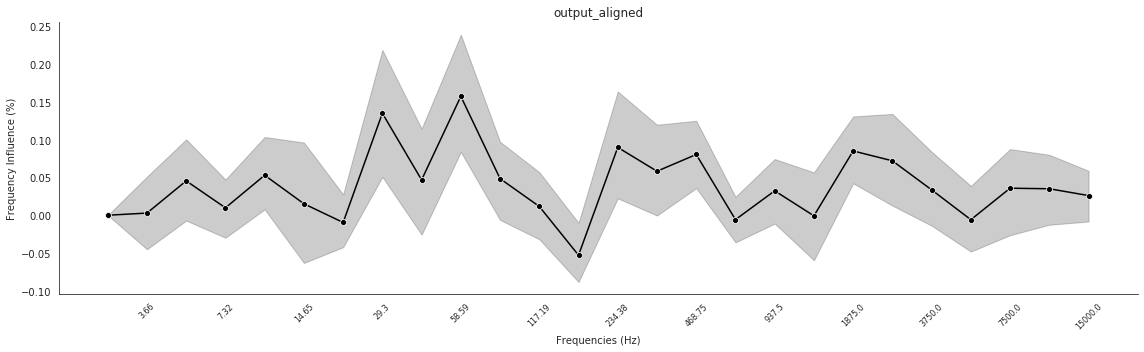

In [10]:
deepinsight.visualize.plot_residuals(fp_deepinsight, frequency_spacing=2,
                                     output_names=['output_aligned'])

In [ ]:
# from tqdm.notebook import tqdm
# import time
# for i1 in tqdm(range(5), ncols='50%'):
#     for i2 in tqdm(range(30), leave=False, ncols='25%'):
#         # do something, e.g. sleep
#         time.sleep(0.1)